Start here

----- Training Blending Models for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blending Technique Ensemble (All Features) Metrics:
Accuracy: 0.9987809060147916
Precision: 0.9987031488732206
Recall: 0.9987809060147916
F1 Score: 0.9987195210903426


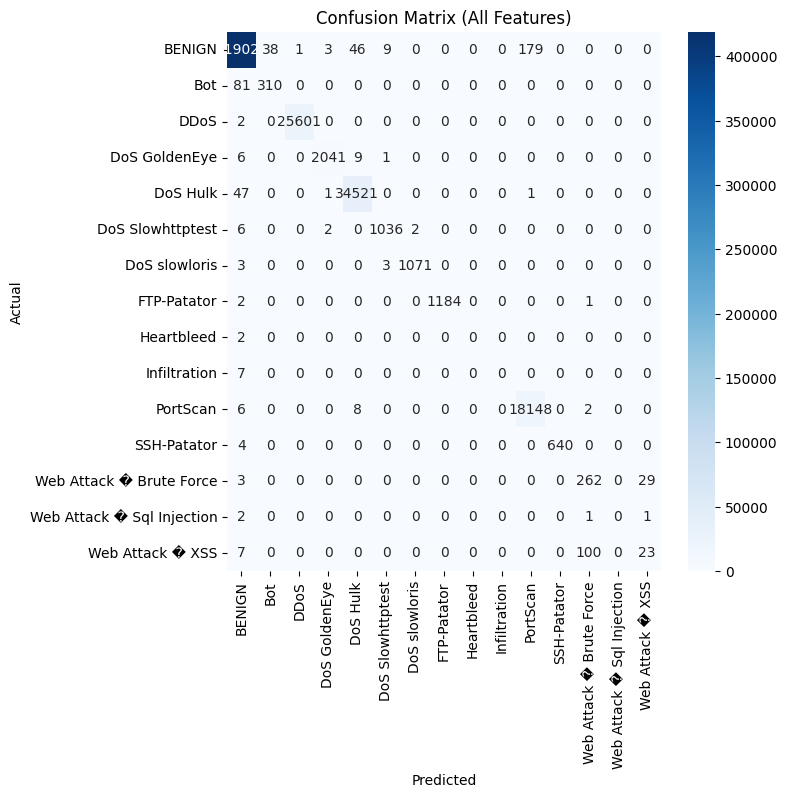

Start here

----- Training Blending Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blending Technique Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9891153738654002
Precision: 0.9887562395785636
Recall: 0.9891153738654002
F1 Score: 0.9882996632896919


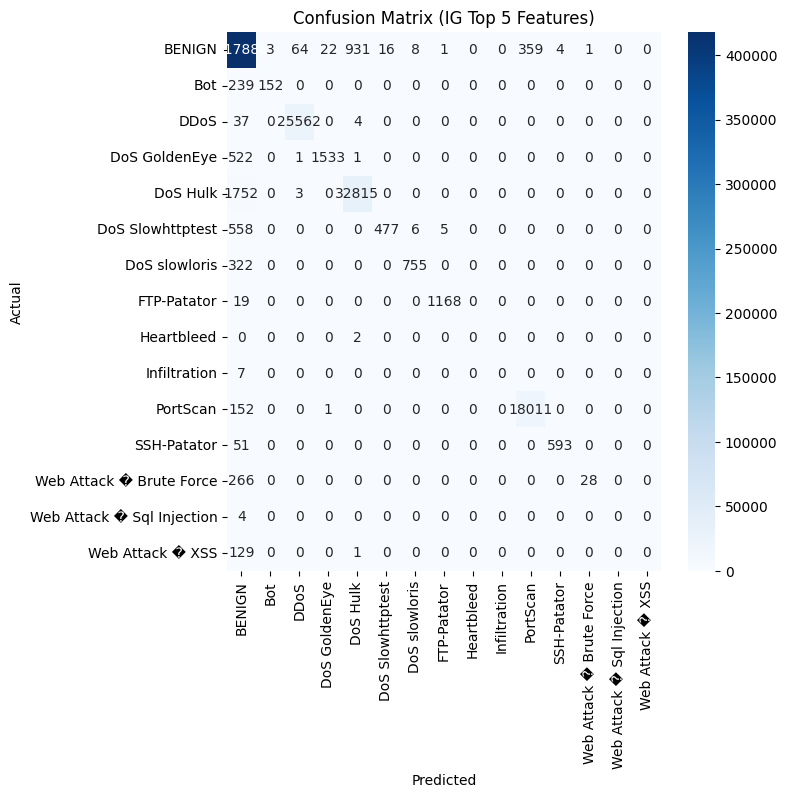

Start here

----- Training Blending Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blending Technique Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9892184517308161
Precision: 0.988841386316075
Recall: 0.9892184517308161
F1 Score: 0.9884130241957941


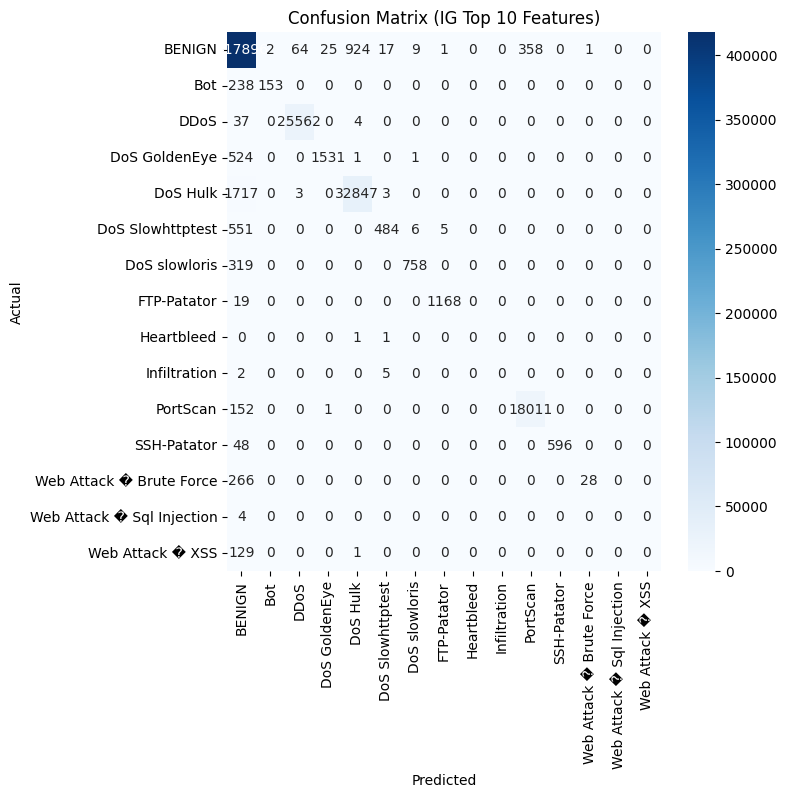

Start here

----- Training Blending Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blending Technique Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9626877949860547
Precision: 0.9607941979894846
Recall: 0.9626877949860547
F1 Score: 0.9615040828450402


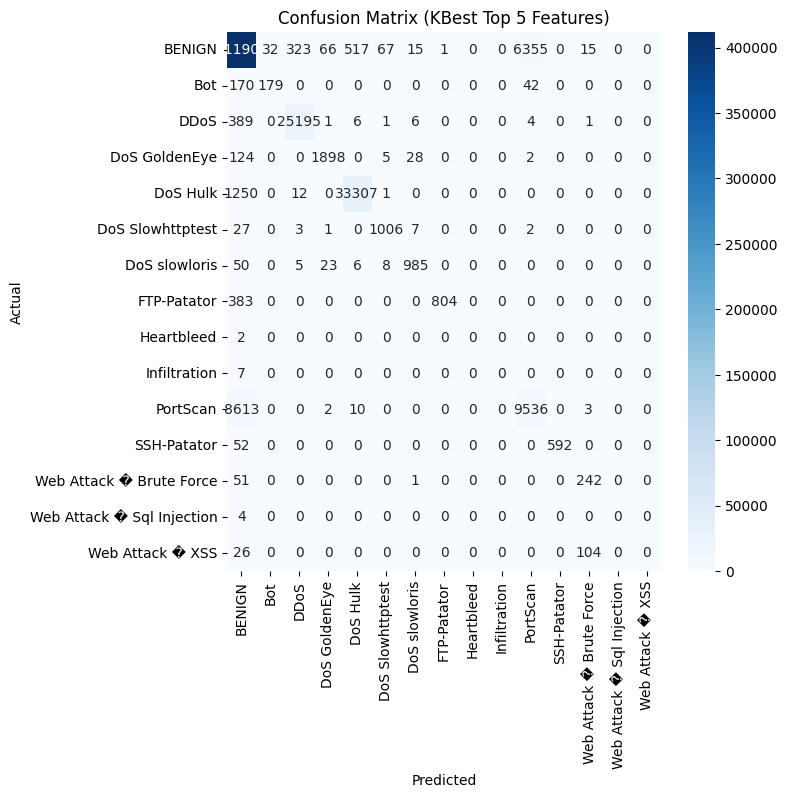

Start here

----- Training Blending Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blending Technique Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9965766255082036
Precision: 0.9964404750997118
Recall: 0.9965766255082036
F1 Score: 0.9963864055127505


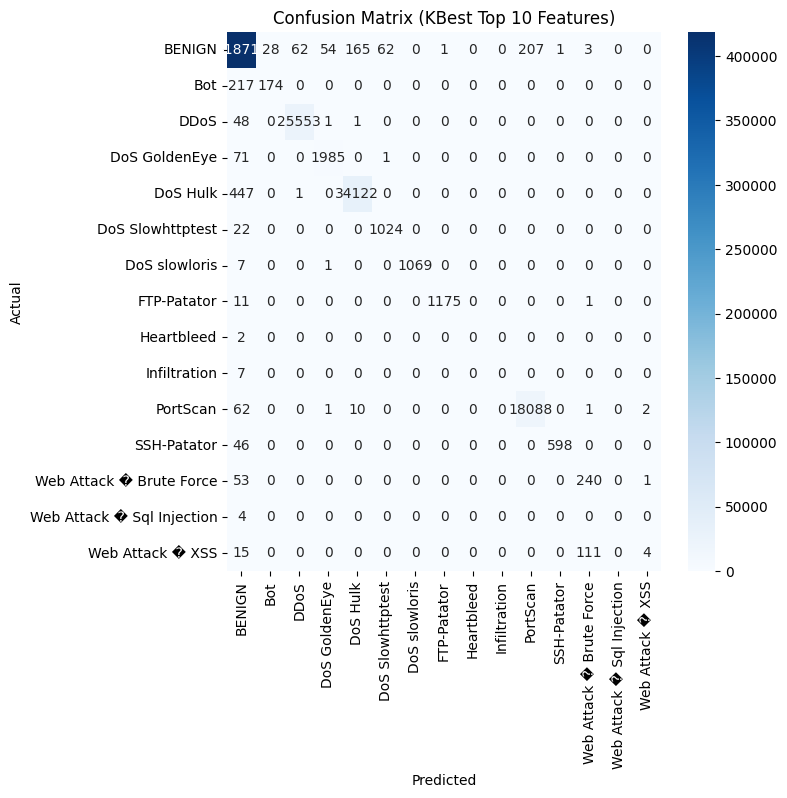

In [1]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train, y_test) in datasets.items():
    print("Start here")
    print(f"\n----- Training Blending Models for {name} -----")

    X_base_tr, X_meta_tr, y_base_tr, y_meta_tr = train_test_split(X_tr, y_train, test_size=0.2, random_state=42)

    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = CatBoostClassifier(verbose=0)  
    model3 = RandomForestClassifier()

    model1.fit(X_base_tr, y_base_tr)
    model2.fit(X_base_tr, y_base_tr)
    model3.fit(X_base_tr, y_base_tr)

    pred1_meta = model1.predict_proba(X_meta_tr)
    pred2_meta = model2.predict_proba(X_meta_tr)
    pred3_meta = model3.predict_proba(X_meta_tr)

    meta_train_data = np.hstack((pred1_meta, pred2_meta, pred3_meta))

    meta_model = LogisticRegression()
    meta_model.fit(meta_train_data, y_meta_tr)

    train_end_time = time.time()

    pred1_test = model1.predict_proba(X_te)
    pred2_test = model2.predict_proba(X_te)
    pred3_test = model3.predict_proba(X_te)

    meta_test_data = np.hstack((pred1_test, pred2_test, pred3_test))
    final_predictions = meta_model.predict(meta_test_data)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, final_predictions, f"Blending Technique Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_predictions, le.classes_, f"Confusion Matrix ({name})")


In [2]:
# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Blending_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0         Blending Technique Ensemble (All Features)  0.998781   0.998703   
1    Blending Technique Ensemble (IG Top 5 Features)  0.989115   0.988756   
2   Blending Technique Ensemble (IG Top 10 Features)  0.989218   0.988841   
3  Blending Technique Ensemble (KBest Top 5 Featu...  0.962688   0.960794   
4  Blending Technique Ensemble (KBest Top 10 Feat...  0.996577   0.996440   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998781  0.998720        5150.213920            16.827421     5167.041341  
1  0.989115  0.988300        1330.391164             4.548664     1334.939828  
2  0.989218  0.988413        1797.785790             4.227701     1802.013491  
3  0.962688  0.961504        1056.761947             6.456958     1063.218905  
4  0.996577  0.996386        1305.541748             5.563326     1311.105074  
